# Data Curation
Jana Bruses | janabruses@pitt.edu | University of Pittsburgh | Feb. 23 - Feb. 24 2025

## 1. A few data considerations
Citing Montoya Abat and Mas I Miralles' notes in Linguistic Variation "written language always represents a later stage than the actual appearance of any linguistic phenomenon, since the written text incorporates innovations when in oral expression they have already been occurring for some time." They further add that in written language, "the appearance of occurrences tends to be considerably reduced." That is since standardization tends to have a stronger influence on written language, particularly in literary works, which go through multiple reviews before publication.

In this regard, Since we are examining language variation, spoken data would likely provide the best approach for identifying traces of Catalan’s substitution. However, as we need our data to span a sufficiently long timeframe to capture changes and differences, finding open spoken resources from earlier periods is highly challenging. Therefore, we will work with the closest available approximation to spoken data: speeches, plenary sessions, and other written records derived from spoken works.

Not being able to find a Catalan corpora covering a timespan over 15 years. We will be using multiple corpora that fulfill the points mentioned above. 

In chronological order these are:
1) **CTIC(1832-1926)**\
Corpora originally containing texts published between 1832 and 1988 expanded to recent works after 2015. Created for the development of the descriptive dictionary of the Catalan language known as DDLC. Part of the corpora has been made available for public use. Only those works that are no longer subject to copyright in Spain are being made public work by work in single text files.\
The downloadable corpora consists of 337 files of literary works and 596 non-literary texts all published before 1985.\
Out of these works, we'll be using 28 speech delivered texts, specifcially speaches.

3) **Radioteca.cat**\
Library of over 300.000 IA-transcrived radio programs and summaries.
Would need to be web-scraped, need to ask for permission.

3) **Parlament Parla (2007-2018)**\
Speech corpus by Col·lectivaT containing Catalan Parliament (Parlament de Catalunya) plenary sessions from 2007 to 2018.\
Transcriptions have been aligned with the recordings and the corpora extracted.\
Corpora comprises 211 hours of clean and 400 hours of other quality segments where each speech segment is tagged with its speaker the speaker's gender.

4) **ParlaMint-ES-CT (2015-2022)**\
ParlaMint-ES-CT is the Spanish and Catalan parlamentary corpora covering from 2015 to 2022 as part of the corpora project ParlaMint: Comparable Parliamentary Corpora. The full corpora contains compliled subcorpora from 29 countries and autonomous regions in original languages as well as machine translated to English.

***If Radioteca.cat does not work:***\
Unfortunately, identifying a publicly available corpus covering the period between 1985 and 2007 that meets our criteria of being as close to spoken data as possible wasn't possible. This gap poses a challenge, as linguistic changes occurring during these two decades may be underrepresented in our analysis. However, we mitigate this by focusing on corpora that maintain a consistent genre—spoken or speech-derived texts—ensuring comparability across different time periods.

## 2. Data processing

The data processing procedure for each of the corpora in cronological order follows.\
For every copora it is processed and then analyzed through a Exploratory Data Analysis (EDA).\
Wraping up with section [2.5](#2.5-Jointly) where all the data is put together and explored in an overall EDA. 

**2.1** [CTILC](#2.1-CTILC)\
**2.2** [Radioteca](#2.2-Radioteca.cat)\
**2.3** [Parlament Parla](#2.3-Parlament-Parla)\
**2.4** [ParlaMint](#2.4-ParlaMint-ES-CT)\
**2.5** [All data jointly](#2.5-Jointly)

### 2.1 CTILC

The files are .txt, so we will parse them using plain text corpus reader.\
Their encoding is UTF-8 with FL line terminator, so they align with our encoding and line termination preference.\
No changes required.

In [266]:
#importing nltk's plain text corpus reader
from nltk.corpus.reader import PlaintextCorpusReader

corpus_root = '/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/data/CTILC/tots'
corpus = PlaintextCorpusReader(corpus_root, r'.*\.txt')

#print(corpus.fileids())  # getting filenames to get a file
print(corpus.raw('001858_Discurs_llegit_en_lo_Certamen_Catalanist.out.txt')[:1000])  # taking a look at part of one of the files

<DOCUMENT>
<OBRA id="1858">
<AUTOR>Sagarra i de Siscar, Ferran de</AUTOR>
<TÍTOL>Discurs llegit en lo Certamen Catalanista de la Joventut Católica de Barcelona</TÍTOL>
<ANY>1891</ANY>
<CLASSIFICACIÓ_TEXTUAL llengua="NLIT" gènere="" tema="2" subtema="2.7" traducció="no" variant="central" />
</OBRA>
<TEXT>Discurs llegit en lo certamen catalanista de la joventut católica de Barcelona

Excm. é Ilm. Sr. Senyors: Quan en Bonaventura Carles Aribau, al començarse lo segon terç de la presént centuria, ab aquell Adéu á la patria, plé de sentiment y tendresa, y ab aquell recort per la llengua en que soná son primer vagit quan del mugró matern la dolça llet bebia, iniciava lo modern renaxement de nostra literatura, ¿qui ho havia de dir, que en breu espay de temps, poetas y prosadors conqueririan tants llors pera les lletres catalanes? Y ab tot, no sols fou axí, sino que ab la remembrança de antigues gestes, al fer reviure grans homens y fets del llibre d' or de nostra historia, se despertá en nosa

In [267]:
# there is some metadata mixed which might actually be very useful
# so we will change the approach and parse the CTILC data as an xml and store it as a pandas dataframe
# where the id, author, title, date and other metadata will be strored in columns
# the text will have its own column

In [268]:
#importing BS, Pandas, NumPy (for NaN values) and Regex
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

CTILC_data = []

for file in corpus.fileids():   
    soup = BeautifulSoup(corpus.raw(file), 'html.parser')
    data = {}  # dictionary for each file

    # "obra" ID (CAT) / work ID (ENG) - we will use ID for short
    obra_tag = soup.find("obra") 
    data["ID"] = obra_tag["id"] if obra_tag and obra_tag.has_attr("id") else np.nan 

    # "autor" (CAT) / Author (ENG) 
    data["Author"] = soup.find("autor").text if soup.find("autor") else np.nan

    # "títol" (CAT) / Title (ENG)
    data["Title"] = soup.find("títol").text if soup.find("títol") else np.nan

    # "any" (CAT) / Year (ENG)
    data["Year"] = soup.find("any").text if soup.find("any") else np.nan

    # "text" (CAT) / "Text" (ENG) - where we will store the content of the files, the non-metadata, the meat
    data["Text"] = soup.find("text").text if soup.find("text") else np.nan
    #in the text the title begins the content, we will get rid of it as we can find a "\n\n" separator between the title and the content
    data["Text"] = re.sub(r".*?\n\n(?=\S)", "", data["Text"], count = 1, flags=re.DOTALL)

    CTILC_data.append(data)

# creating Pandas df
CTILC_df = pd.DataFrame(CTILC_data)

#taking a look at the head of the CTILC data frame
CTILC_df.head()

,ID,Author,Title,Year,Text
0,766,"Serra i Pagès, Rossend",Discurs llegit per... donar a conèxer la perso...,1926,"L'home que per amor al estudi, impulsat per un..."
1,1100,"Millet i Pagès, Lluís",Parlament llegit en la festa inaugural de l'Or...,1920,"Cantaires de la Garriga, Senyores i senyors:\n..."
2,1664,"Miró i Borràs, Oleguer",Discurs-pròlec,1900,Discurs-prolec Llegit en la societat mèdic-far...
3,1784,"Balari i Jovany, Josep",Discurs,1894,"Senyors excelentissims, senyors:\n\nQuan rebí ..."
4,1820,"Torras i Ferreri, Cèsar August",Discurs,1903,"Senyors:\n\nSembla que era air, y fa ja uns qu..."


#### CTILC EDA

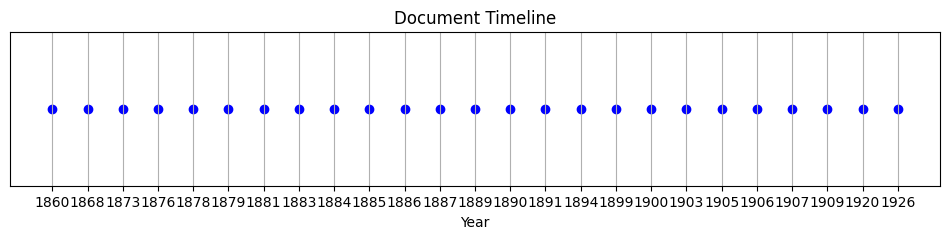

In [269]:
import matplotlib.pyplot as plt

# extacting unique years and sorting them
years = sorted(CTILC_df["Year"].unique())

# create place holder for y-values 
y_values = [1] * len(years)  # Place all points at y=1

# Plot each year as a point on the timeline
fig, ax = plt.subplots(figsize=(12, 2)) 
ax.scatter(years, y_values, color="blue", marker="o")

# Formatting
ax.set_xlabel("Year")
ax.set_yticks([])  # Remove y-axis labels since they are not meaningful
ax.set_title("Document Timeline")
ax.grid(axis="x")  # Only gridlines on x-axis

plt.show()


### 2.2 Radioteca.cat 
https://radioteca.cat/about-us

I still haven't gotten a response to whether I can scrape this or not. I'll get to it as soon as I can, as it covers the time gap between the corpora.

### 2.3 Parlament Parla

The files are .tsv, so we will parse them using Pandas.\
Their encoding is UTF-8 but CRFL line terminators, that were converted to FL line terminators using dos2unix on terminal.

In [270]:
# loading data and creating a Pandas dataframe:

In [271]:
def partition_reading(path):
    '''
    takes in a path and returns a dataframe containing:
        1) the content of the tsv file
        2) a column with the partition extracted from the 4th to 15th character of the path starting from the back
    '''
    df = pd.read_csv(path,  sep='\t', header = 0)
    df["Partition"] = path[-15:-4]
    return df

In [272]:
# importing os
import os
#corpus_root = 'dataCAT/ParlamentParla'

#reading in each of the partitions and turning them into separate data frames
clean_tr = partition_reading("/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/data/ParlamentParla/clean_train.tsv")
clean_dev = partition_reading("/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/data/ParlamentParla/clean_dev.tsv")
clean_ts = partition_reading("/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/data/ParlamentParla/clean_test.tsv")
#other_tr = pd.read_csv('dataCAT/ParlamentParla/other_train.tsv')
other_dev = partition_reading("/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/data/ParlamentParla/other_dev.tsv")
other_ts = partition_reading("/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/data/ParlamentParla/other_test.tsv")

#merging data frames in a single dataframe through concatenation
parlament_parla_df = pd.concat([clean_tr, clean_dev, clean_ts, other_dev, other_ts]) #other_tr missing
parlament_parla_df.columns = ["Speaker_id", "Path", "Text", "Gender", "Duration", "Partition"]

#taking a look at part of the dataframe
parlament_parla_df.head()

,Speaker_id,Path,Text,Gender,Duration,Partition
0,164,clean_train/3/1/31ca4d158eaef166c37a_18.87_23....,perquè que el president de catalunya sigui reb...,M,4.71,clean_train
1,164,clean_train/3/1/31ca4d158eaef166c37a_60.13_65....,que lliga absolutament amb allò que vostè diu ...,M,5.50,clean_train
2,336,clean_train/2/8/2803008bb00cb0c86de6_17.0_30.1...,gràcies presidenta consellera atès l'inici del...,M,13.15,clean_train
3,336,clean_train/2/8/2803008bb00cb0c86de6_31.03_44....,li volem preguntar si el seu departament té pr...,M,13.02,clean_train
4,336,clean_train/2/8/2803008bb00cb0c86de6_44.74_53....,per tal d'iniciar la recuperació de l'ensenyam...,M,8.49,clean_train


### 2.4 ParlaMint-ES-CT

Files are in multiple formats. To be consistent with the other datasets, which are less flexible, we'll use the tsv documents for the metadata and the txt documents for the text content/transcription.

In [273]:
#ParlaMint part 1 - Metadata/tsv
import glob

# defining the path where ParlaMint data is stored
data_path = "/Users/janabruses/Documents/data_science/Linguistic-Markers-Catalan-Substitution/data/ParlaMint-ES-CT.ana/ParlaMint-ES-CT.txt"  # Adjust to your directory

# loading all metadata/.tsv files
metadata_files = glob.glob(os.path.join(data_path, "**", "*-meta.tsv"))

# reading in and concatenating all metadata files
metadata = []
for file in metadata_files:
    meta_df = pd.read_csv(file, sep="\t", index_col = False)
    metadata.append(meta_df)

metadata_df = pd.concat(metadata)

# taking a quick look at the metadata dataframe
metadata_df.head()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_MP,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth
0,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.1.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
1,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.224.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,MP,notMinister,GP-ERC,Grup Parlamentari Esquerra Republicana de Cata...,Coalition,Entre centreesquerra i esquerra,VilaltaMarta,"Vilalta i Torres, Marta",F,1984
2,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.2.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970
3,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.3.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,Minister,ERC,Esquerra Republicana de Catalunya,-,Entre centreesquerra i esquerra,VilagràLaura,"Vilagrà Pons, Laura",F,1976
4,ParlaMint-ES-CT_2022-07-07-3502,ParlaMint-ES-CT_2022-07-07-3502.4.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-07,Unicameralisme,XIV Legislatura,-,35,2,-,...,notMP,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970


In [274]:
#ParlaMint part 2 - txt/content

# loading all text files
text_files = glob.glob(os.path.join(data_path, "**", "*.txt"), recursive=True)

# reading in and concatenating all text files
text_list = []
for file in text_files:
    if "README" not in file: # avoiding the README.txt getting mixed up with our data
        text_df = pd.read_csv(file, sep="\t", header = None)
        text_list.append(text_df)

text_df = pd.concat(text_list)

# giving name columns ID and Text to the dataframe columns
text_df = text_df.rename(columns ={0: "ID", 1:"Text"})

# taking a quick look at the txt files dataframe
text_df.tail()

,ID,Text
126,ParlaMint-ES-CT_2016-06-09-1802.127.0,"Moltes gràcies, senyor Fernández. A continuaci..."
127,ParlaMint-ES-CT_2016-06-09-1802.128.0,"Gràcies, presidenta. Bon dia. Des de la CUP, e..."
128,ParlaMint-ES-CT_2016-06-09-1802.129.0,"Moltes gràcies, senyora Vehí. A continuació, t..."
129,ParlaMint-ES-CT_2016-06-09-1802.130.0,"Gràcies, presidenta. Vicepresident, consellera..."
130,ParlaMint-ES-CT_2016-06-09-1802.131.0,"Moltes gràcies, senyor Bonvehí. Acabat el deba..."


In [275]:
# let's compare the two data frames text and metadata to see if we can merge them
print("The metadata data frame has the following dimensions:", metadata_df.shape)
print("The text data frame has the following dimensions:", text_df.shape)

The metadata data frame has the following dimensions: (50824, 23)
The text data frame has the following dimensions: (50824, 2)


In [276]:
# the number of rows matches which is a great sign that no data was left behind in the creation of the data frame
# it lets us know that we can merge it by using the file IDs

In [277]:
# merging with ID as index
parlaMint_df = metadata_df.merge(text_df, on="ID", how="outer")

In [278]:
# taking a quick look at the ParlaMint dataframe
parlaMint_df.tail()

,Text_ID,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,...,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,Text
50819,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.95.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"I, finalment, en nom del Grup Mixt, té la para..."
50820,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.96.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-GM,Grup Mixt,-,Entre centredreta i dreta,FernándezAlejandro,"Fernández Álvarez, Alejandro",M,1976,"Gràcies, presidenta. Quan es parla del litoral..."
50821,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.97.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Moltes gràcies. Finalment, per pronunciar-se s..."
50822,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.98.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-CUP,Grup Parlamentari de la Candidatura d'Unitat P...,Opposition,Entre esquerra i extrema esquerra,CornellàDani,"Cornellà Detrell, Dani",M,1978,"Bé, gràcies. Primer de tot, faré una esmena in..."
50823,ParlaMint-ES-CT_2022-07-21-3602,ParlaMint-ES-CT_2022-07-21-3602.99.0,"Corpus Parlamentari en català ParlaMint-ES-CT,...",2022-07-21,Unicameralisme,XIV Legislatura,-,36,2,-,...,notMinister,GP-JxCAT,Grup Parlamentari de Junts per Catalunya,Coalition,Entre centredreta i dreta,BorràsLaura,"Borràs i Castanyer, Laura",F,1970,"Un moment, diputat. Silenci, si us plau. Deman..."


In [279]:
# re-checking dimensions
print("Both the metadata and text dataframes had the following dimensions:", metadata_df.shape)
print("The merged data frame has the following dimensions:", parlaMint_df.shape)

Both the metadata and text dataframes had the following dimensions: (50824, 23)
The merged data frame has the following dimensions: (50824, 24)


In [280]:
# the dimensions are correct
# there is the same number of rows and the text column has been added to the 23 columns that the metadata dataframe had before

#### ParlaMint EDA

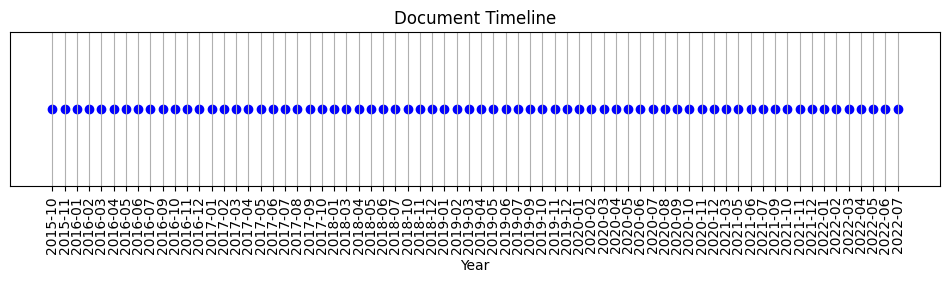

In [281]:
import matplotlib.pyplot as plt

# extacting unique years and sorting them
years = sorted((parlaMint_df["Date"].apply(lambda x :x[0:7])).unique())

# create place holder for y-values 
y_values = [1] * len(years)  # Place all points at y=1

# Plot each year as a point on the timeline
fig, ax = plt.subplots(figsize=(12, 2)) 
ax.scatter(years, y_values, color="blue", marker="o")

# Formatting
ax.set_xlabel("Year")
ax.set_yticks([]) # Remove y-axis labels since they are not meaningful
ax.set_title("Document Timeline")
ax.grid(axis="x")
plt.xticks(rotation=90)

plt.show()

### 2.5 Jointly 

Some of the data frames come with a great amount of metadata that won't be necessary for our research purposes. To keep it we will maintain the separate dataframes and create a merged one extracting only the columns necessary for our research question. That will be the title, date and text/content. We will also create other columns that will be useful for our Exploratory Data Analysis. 

In [282]:
reduced_CTILC = CTILC_df.filter(["Year", "Title", "Text"])
reduced_parlament_parla = parlament_parla_df.filter(["Path", "Sentence"])
reduced_parlamint = parlaMint_df.filter(["Date", "Title", "Text"])

There is no date metadata provided for the parlament parla dataframe.\
For our purposes, as we need a date we will make an aproximation based off the data given by the owners.\
As Parlament Parla is presented as a corpora containing data from 2007 to 2015 we will assign the date aproximation 2010 to all the data in the Parlament Parla dataframe.\
We will also only keep the year infomation as the date in the corpora parlamint where the full (month, day, year) information was provided.

In [283]:
# adding 2010 date to parlament parla rows
reduced_parlament_parla["Year"] = 2010

# keeping only the year on parlaMint
reduced_parlamint["Date"] = reduced_parlamint["Date"].apply(lambda x :x[0:4])

In [284]:
# adjusting columns to match before concatenating
reduced_parlament_parla = reduced_parlament_parla.rename(columns ={"Year":"Year", "Path":"Title", "Sentence":"Text"})
reduced_parlamint = reduced_parlamint.rename(columns ={"Date":"Year", "Title":"Title", "Text":"Text"})

In [285]:
# concatenating all datasets' relevant columns in a single data frame
joined_data = pd.concat([reduced_CTILC, reduced_parlament_parla, reduced_parlamint]) # radio missing

In [286]:
# sorting joined data by year, from oldest to most recent
joined_data["Year"] = joined_data["Year"].apply(lambda x : int(x))
joined_data.sort_values(["Year"])

,Year,Title,Text
27,1860,Discurs,"Breu seré, cuant ja se han complagut vostres o..."
23,1868,Discurs,Excel·lentissim senyor:\n\nA últims del segle ...
26,1873,Discurs pronunciat en la sessió inaugural que ...,Senyors:\n\nDever meu es avuy 'l dirigirvos la...
25,1876,Teatre catalá,Sempre es estada tal la seua manera de reprodu...
21,1878,Discurs inaugural,Discurs inaugural.\n\nExcel·lentísim senyor; S...
...,...,...,...
46904,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Moltes gràcies, presidenta. Senyor diputat, co..."
46903,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Per respondre, té la paraula el president de l..."
46902,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Señor president, ¿van a cumplir ustedes la sen..."
46900,2022,"Corpus Parlamentari en català ParlaMint-ES-CT,...","Gràcies, presidenta, i gràcies, diputat. Què e..."


In [287]:
# creating a length, in tokens, columnm
joined_data["Length"] = joined_data["Text"].apply(len)
joined_data

TypeError: object of type 'float' has no len()

In [ ]:
year_length = {}

# setting year as the index
joined_data = joined_data.set_index("Year")

# iterating over the rows
for year, row in joined_data.iterrows():
    if year not in year_length:
        year_length[year] = row["Length"]  # initializing year's length total
    else:
        year_length[year] += row["Length"]  # accumulating length to already present year

In [ ]:
import matplotlib.ticker as ticker  

# placeholder y-values for timeline
years = list(year_length.keys())  
y_values = np.ones(len(years)) 

# creating mosaic layout for our multiple plots
fig, ax = plt.subplot_mosaic([["B", "B"],  # Timeline
                              ["A", "A"],  # Histogram
                              ["D", "D"]],  # Text count & corpus length
                             figsize=(10, 8),
                             constrained_layout=True)

# (A) Histogram of Document Distribution Over Time
ax['A'].hist(joined_data.index, bins=min(20, len(years)), histtype='step', color="blue", lw=1.5)
ax['A'].set_title("Document Distribution Over Time")
ax['A'].set_xlabel("Year")
ax['A'].set_ylabel("Count")

# (B) Timeline (Scatter Plot)
ax['B'].scatter(years, y_values, color="blue", marker="o", lw=1.5)
ax['B'].set_title("Timeline of Documents")
ax['B'].set_xlabel("Year")
ax['B'].set_yticks([])  # Remove y-axis labels since they are not meaningful
ax['B'].grid(axis="x")

# (D) Text length per year in token counts
capped_values = [min(val, 10_000_000) for val in year_length.values()]  # limit to 10M

ax['D'].barh(list(year_length.keys()), capped_values, color="blue")
ax['D'].set_title("Text Length per Year (Raw Token Count, Capped at 10M)")  
ax['D'].set_xlabel("Text Length (Raw Token Count)")  

# Fix Tick Labels (Without `ticker`)
x_ticks = ax['D'].get_xticks()  
ax['D'].set_xticks(x_ticks)  
ax['D'].set_xticklabels([f"{int(x):,}" for x in x_ticks])  
ax["D"].set_xlim(0, 10_000_000)

# displaying the plots' mosaic
plt.show()

In [ ]:
def generalEDA_function(dataframe, corpus_name):
    print("--- EDA", corpus_name, "---")
    print("The dataframe has:",
          dataframe.shape[0], "rows",
          dataframe.shape[1], "columns", "\n")
    print("Dataframe's info is:")
    print(dataframe.info(), "\n")
    print("The Dataframe's", len(dataframe.columns), "columns are:", "\n", dataframe.columns, "\n")
    dataframe["Text_len"] = dataframe["Text"].apply(len)
    print("The total length of the Dataframe excluding the metadata is:", "\n", dataframe["Text_len"].sum(), "\n", "\n")
    # time range
    print("The description of the dataframe is:", "\n",
          dataframe.describe())

# run specific EDA, partitions, etc. 

In [ ]:
generalEDA_function(CTILC_df, "CTILC")
generalEDA_function(parlaMint_df, "ParlaMint")
generalEDA_function(parlament_parla_df, "Parlament Parla")